### 참고자료

https://tykimos.github.io/2017/08/17/Text_Input_Binary_Classification_Model_Recipe/

https://tykimos.github.io/2017/03/25/Dataset_and_Fit_Talk/

https://github.com/rickiepark/deep-learning-with-python-notebooks/blob/master/3.4-classifying-movie-reviews.ipynb

https://medium.com/@hobinjeong/cnn%EC%97%90%EC%84%9C-pooling%EC%9D%B4%EB%9E%80-c4e01aa83c83

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
# 0. 사용할 패키지 불러오기
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

max_features = 20000
text_max_words = 200

### 데이터 셋

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

LSTM과 같은 데이터 셋을 사용하므로, 같은 방법으로 데이터 셋을 생성하고 이를 같은 크기로 맞추는 전처리를 수행한다.

### 모델 구성

In [4]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 198, 256)          98560     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)  

LSTM과 동일한 방식으로 모델을 구성하지만, 여기서는 CNN을 사용할 것이므로 Conv1D를 모델 레이어로 추가한다. Dropout과 relu가 추가되었다. dropout은 overfitting을 방지하기 위해 추가된 레이어이고, relu는 sigmoid와 똑같게 결과값을 기대하기 위해 사용하는 레이어이다. 여기서 max_pooling이 있는데, CNN은 데이터 특징을 뽑아 내는 방식이므로, max_pooling에서 뽑아낸 데이터를 relu로 1차적으로 평가하고 최종적으로는 sigmoid를 이용하여 학습 결과를 내는 방식인것 같다.

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 7s 344us/step - loss: 0.4664 - acc: 0.7568 - val_loss: 0.3045 - val_acc: 0.8736
Epoch 2/25
20000/20000 [==============================] - 4s 195us/step - loss: 0.2151 - acc: 0.9153 - val_loss: 0.2609 - val_acc: 0.8930
Epoch 3/25
20000/20000 [==============================] - 4s 196us/step - loss: 0.0858 - acc: 0.9739 - val_loss: 0.2890 - val_acc: 0.8928
Epoch 4/25
20000/20000 [==============================] - 4s 197us/step - loss: 0.0222 - acc: 0.9951 - val_loss: 0.3511 - val_acc: 0.8938
Epoch 5/25
20000/20000 [==============================] - 4s 197us/step - loss: 0.0060 - acc: 0.9995 - val_loss: 0.3896 - val_acc: 0.8938
Epoch 6/25
20000/20000 [==============================] - 4s 203us/step - loss: 0.0022 - acc: 0.9997 - val_loss: 0.4246 - val_acc: 0.89

모델을 컴파일하고 학습을 진행하였다. 역시 정확도를 기반으로 학습을 수행하였고, 바이너리 기댓갓을 내기위해 loss_function은 binary_crossentropy를 사용하였다. epochs는 조건에 맞추어 25로 설정하였다.

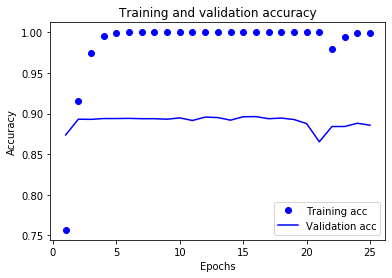

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

LSTM에 비해 정확도가 상당히 높다. 하지만 loss율이 다른 방식들에 비해 높다. 또한 실제로 model predict를 돌려보면, 정확도는 높게 나오지만 실제 결과는 중간값이 많이 잡혀서 나온다.

In [7]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print(loss_and_metrics)
model.predict(x_val)

25000/25000 [==============================] - 1s 47us/step
[0.691278098897934, 0.8686000000190734]


array([[3.3733526e-01],
       [7.1525574e-07],
       [9.9979329e-01],
       ...,
       [8.1360036e-01],
       [9.9909699e-01],
       [7.7486038e-07]], dtype=float32)